In [1]:
#preparar un conjunto de datos para desarrollar un modelo de Regresión Logística que nos permita optimizar la conversión de prospectos en 
#estudiantes activos en la Escuela  Online de Negocios(EON).

In [2]:
#Importar Bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importar datos

df = pd.read_csv('C:\\Users\\ALLAN\\Desktop\\Business Analitics con Python y ChatGPT\\EON.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Tenemos dos variables que podrían funcionar como 'ID': Prospect ID y Lead Number. Botemos la más compleja Prospect ID
df.drop(columns= 'Prospect ID', axis = 1, inplace = True)

In [6]:
df.set_index('Lead Number', inplace = True)

In [7]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
# Examinemos los datos para ver su tipo y si hay faltantes
# Notamos que hay 9240 registros, pero de las 35 variables, 17 tienen variables null

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677

In [9]:
# Como parte de nuestra preparación de los datos, iremos revisando una a una las variables para corregir su tipo de datos
# y hacer las respectivas imputaciones de datos faltantes

In [10]:
# Lead Source
# Hagamos un gráfico de barras para contar las fuentes del tráfico

<Axes: xlabel='count', ylabel='Lead Source'>

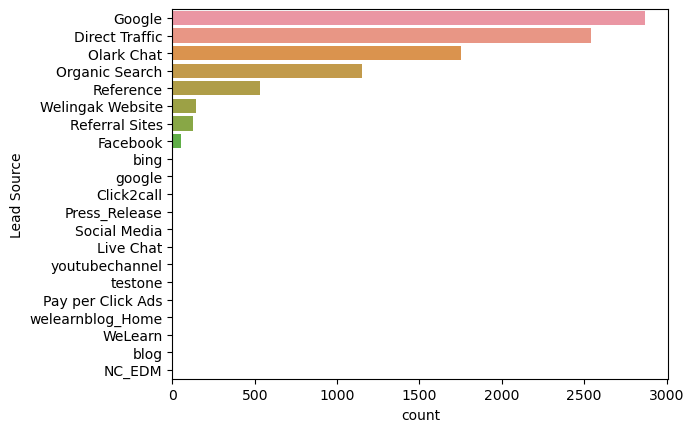

In [11]:
sns.countplot(y='Lead Source', data = df, order = df['Lead Source'].value_counts().index)

In [12]:
#Si en el análisis exploratorio de datos se hubieramos identificado una fuente de tráfico (Lead Source) que fuera claramente la más común,
#la estrategia más directa habría sido reemplazar los valores faltantes con la fuente de tráfico más frecuente, es decir, la moda.
#Esto se basa en la suposición de que es más probable que un nuevo lead provenga de la fuente más común.Como no es el caso, simplemente
#asignaremos el valor "Desconocido" a los valores faltantes.

In [13]:
df['Lead Source'] =df['Lead Source'].fillna('Desconocido')

In [14]:
#Corrección de Tipo de Datos: Do Not Email, Do Not Call, Converted

#Do Not Email: Una variable indicadora seleccionada por el cliente donde eligen si desean o no recibir correos electrónicos sobre el curso.

#Do Not Call: Una variable indicadora seleccionada por el cliente donde eligen si desean o no ser llamados sobre el curso.

#Converted: La variable objetivo. Indica si un lead ha sido convertido exitosamente o no.

In [15]:
# Convirtamos las variables a booleanos. Como haremos lo mismo con las tres, hagamos un lazo for

In [16]:
for v in ['Do Not Email', 'Do Not Call', 'Converted']:
    df[v] = df[v].replace('Yes', 1)
    df[v] = df[v].replace('No', 0)
    df[v] = df[v].astype(bool)

In [17]:
#Manejo de Valores Nulos: TotalVisits y Page Views Per Visit

#TotalVisits: El número total de visitas realizadas por el cliente en el sitio web.

#Page Views Per Visit: El número total de páginas vistas por el cliente durante sus visitas en el sitio web.

#Evaluamos la distribución de cada una de estas características para determinar el mejor método de imputación.

In [18]:
# Examinemos la distribución de Total Visits

df['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TotalVisits', ylabel='Count'>

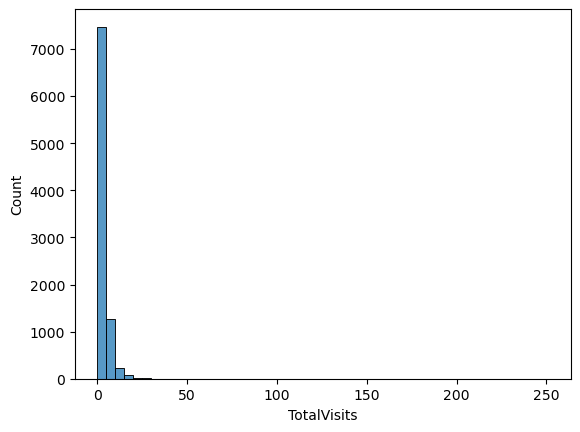

In [19]:
# Hagamos un histograma de la distribución# Hagamos un histograma de la distribución

sns.histplot(x='TotalVisits', data=df, bins=50)

In [20]:
# Examinemos la distribución de 'Page Views Per Visit'

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

C:\Users\ALLAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Page Views Per Visit', ylabel='Count'>

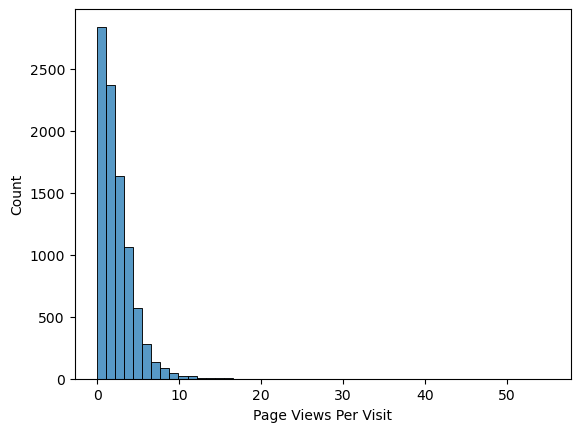

In [21]:
# Hagamos un histograma de la distribución

sns.histplot(x='Page Views Per Visit', data=df, bins=50)

In [22]:
#"Teoría:" Cuando una distribución está severamente sesgada, el uso de la mediana para imputar valores faltantes es apropiado porque 
#la mediana es menos susceptible a la influencia de valores atípicos o extremos, proporcionando una mejor estimación central para datos sesgados.

#Si la distribución de estas características no estuviera sesgada y, en cambio, fuera normal (simétrica), podríamos considerar usar 
#la media para la imputación de valores faltantes. La media es una medida buena y representativa de tendencia central para distribuciones 
#que no están sesgadas, ya que en una distribución normal, la media y la mediana son prácticamente iguales.

In [23]:
# Imputamos la mediana para los valores faltantes de TotalVisits

df['TotalVisits'] = df['TotalVisits'].fillna(df['TotalVisits'].median())

In [24]:
# Imputamos la mediana para los valores faltantes de 'Page Views Per Visit'

df['Page Views Per Visit'] = df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9240 entries, 660737 to 579533
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   bool   
 3   Do Not Call                                    9240 non-null   bool   
 4   Converted                                      9240 non-null   bool   
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        677